In [1]:
from captcha_model import *
from captcha_solver import *

In [2]:
device

device(type='cpu')

In [3]:
model = Model(n_classes, input_shape=(3, height, width))
model.load_state_dict(torch.load("ctc6w.pth"))

<All keys matched successfully>

In [4]:
model.eval()

Model(
  (cnn): Sequential(
    (conv11): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu11): ReLU(inplace=True)
    (conv12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn12): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu12): ReLU(inplace=True)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv21): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn21): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu21): ReLU(inplace=True)
    (conv22): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn22): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu22): ReLU(inplace=True)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilati

In [5]:
img_list, label_list = load_labeled_data()

In [6]:
%time pred_list = predict(model, img_list)

Wall time: 1.57 s


In [7]:
word_acc, char_acc = validate(pred_list, label_list)
print(f"word_acc:{word_acc}, char_acc:{char_acc}")

word_acc:0.24, char_acc:0.61


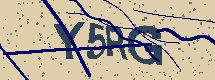

In [8]:
to_pil_image(img_list[0])

In [9]:
%time solve_ctc(model, img_list[0])

Wall time: 36 ms


'YJRG'

In [10]:
solve_tesseract(img_list[0]) # require tesseract

'ARES\n\x0c'